# Feature Engineering 
Obtain model feature from the raw html files

In [1]:
#imports
import numpy as np
import pandas as pd
import save as sv
import capture as cp

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
path = "/Users/conorosully/Google Drive/Projects/github-rater/rating/{}"

## Target Variable 
Obtain the GitHub profile ratings

In [3]:
rating_1 = pd.read_csv(path.format("rating_1.csv"),names=['url','username','r1'])
rating_1['r1']= [float(r) for r in rating_1['r1']]
print(len(rating_1))

rating_2 = pd.read_csv(path.format("rating_2.csv"),names=['url','username','r2'])
rating_2['r2']= [float(r) for r in rating_2['r2']]
print(len(rating_2))

rating = pd.merge(rating_1, rating_2, how='inner', on=['url','username'])
print(len(rating))
rating.head()


231
232
230


,url,username,r1,r2
0,https://github.com/indeyets,indeyets,3.5,4.5
1,https://github.com/ructhless,ructhless,0.0,0.0
2,https://github.com/garand,garand,4.0,3.0
3,https://github.com/ahmednour2030,ahmednour2030,2.0,2.0
4,https://github.com/leimao,leimao,5.0,3.0


In [4]:
round(np.mean(rating['r1']),2)

2.51

In [5]:
round(np.mean(rating['r2']),2)

2.13

In [6]:
rating['r1'].value_counts()

2.0    35
3.0    34
4.0    34
1.0    27
2.5    22
0.0    21
3.5    18
5.0    15
1.5     9
0.5     8
4.5     7
Name: r1, dtype: int64

In [7]:
rating['r2'].value_counts()

1.0    31
2.0    28
0.5    27
3.0    24
0.0    23
1.5    22
4.0    18
2.5    18
4.5    14
3.5    13
5.0    12
Name: r2, dtype: int64

In [8]:
np.corrcoef(rating['r1'],rating['r2'])

array([[1.        , 0.80799819],
       [0.80799819, 1.        ]])

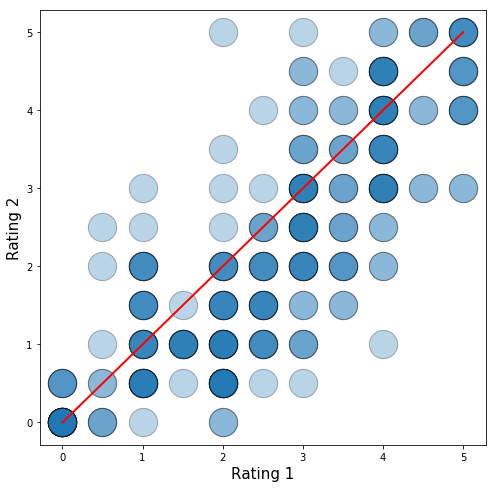

In [12]:
plt.subplots(nrows=1, ncols=1,figsize=(8,8))
plt.scatter(rating['r1'],rating['r2'],s=800,alpha=0.3,edgecolors='#000000')
plt.ylabel("Rating 2",size=15)
plt.xlabel('Rating 1',size=15)

plt.plot([0, 5], [0, 5], 'r-', lw=2)

plt.savefig('../figures/ratings_1.png',format='png')

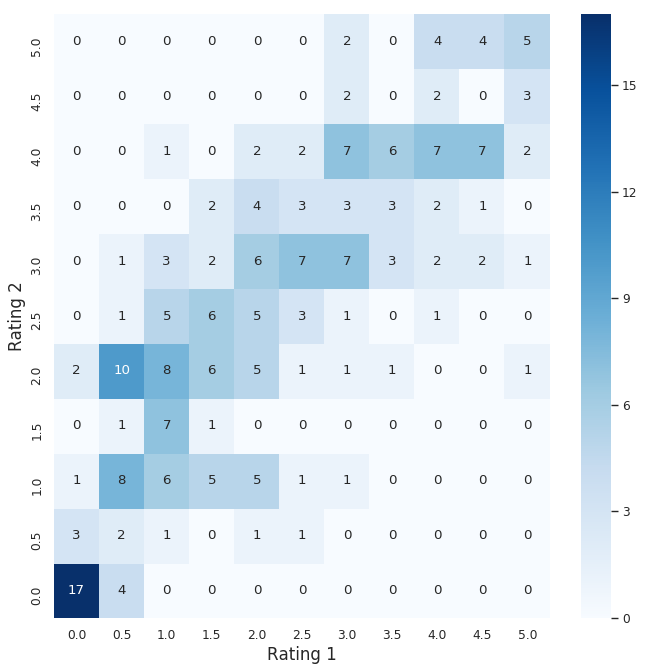

In [37]:
labels = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

mat = []
for i in labels:
    vec = []
    for j in labels:
        vec.append(len(rating[(rating.r1==i) & (rating.r2==j)]))
    mat.append(vec)
    
mat_df = pd.DataFrame(mat,columns=labels,index=labels)

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(font_scale=1)

ax = plt.axes()
sns.heatmap(mat_df,cmap="Blues",ax=ax,annot=True,fmt='.5g')

plt.ylabel("Rating 2",size=15)
plt.xlabel('Rating 1',size=15)
ax.invert_yaxis()

In [ ]:

ax.set_title('Figure 3: ANN Confusion Matrix Heatmap')
plt.show()

In [11]:
rating['diff'] = abs(rating.r1-rating.r2)
rating.sort_values(by='diff',ascending=False)

,url,username,r1,r2,diff
112,https://github.com/obreschkow,obreschkow,4.0,1.0,3.0
164,https://github.com/tanelpuhu,tanelpuhu,2.0,5.0,3.0
81,https://github.com/aricorte,aricorte,3.0,0.5,2.5
61,https://github.com/peijoy,peijoy,3.0,1.0,2.0
212,https://github.com/TDKPS,TDKPS,2.0,0.0,2.0
108,https://github.com/Fineas,Fineas,4.0,2.0,2.0
163,https://github.com/Nov05,Nov05,3.0,5.0,2.0
189,https://github.com/vincentpanqi,vincentpanqi,2.0,0.0,2.0
162,https://github.com/skochinsky,skochinsky,3.0,1.0,2.0
87,https://github.com/knomad,knomad,2.5,0.5,2.0
